### 3d Charts

### Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{ 2x \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} +1 \right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{ 2y \ln(3) \cdot 3^{-x^2 - y^2}}{ \left(3^{-x^2 - y^2} +1 \right)^2}$$

In [126]:
import matplotlib.pyplot as plt
import numpy as np
import sys

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #colores for the 3d chart depth
from sympy import symbols, diff
from math import log
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [127]:
# Partial derivative function example 4
def fpx(x, y):
    r = 3**(-x**2 - y **2)
    return (2*x*log(3) * r) / ( r + 1 )**2
def fpy(x, y):
    r = 3**(-x**2 - y **2)
    return (2*y*log(3) * r) / ( r + 1 )**2


In [128]:
fpx(1.8, 1.0)

0.036808971619750504

### Graphing 3d Gradient Descent & Advanced numpy Arrays

In [129]:
# Setup
multiplyer = 0.3
max_i = 40
# initial guess
params = np.array([1.8, 1.0])
values_array = params.reshape(1,2)


for n in range (max_i):
# Sympy import is slow in the loop
#    gradient_x = diff(f(a,b), a).evalf(subs={a:params[0], b:params[1]})
#    gradient_y = diff(f(a,b), b).evalf(subs={a:params[0], b:params[1]})
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplyer * gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0 )

# Results print
print('Values in gradient array: ', gradients)
print('Min occures at x values of: ', params[0])
print('Min occures at y values of: ', params[1])
# print('Cost is: ', f(params[0], params[1]))

Values in gradient array:  [0.04794423 0.02663568]
Min occures at x values of:  0.07290077889347893
Min occures at y values of:  0.04050043271859942


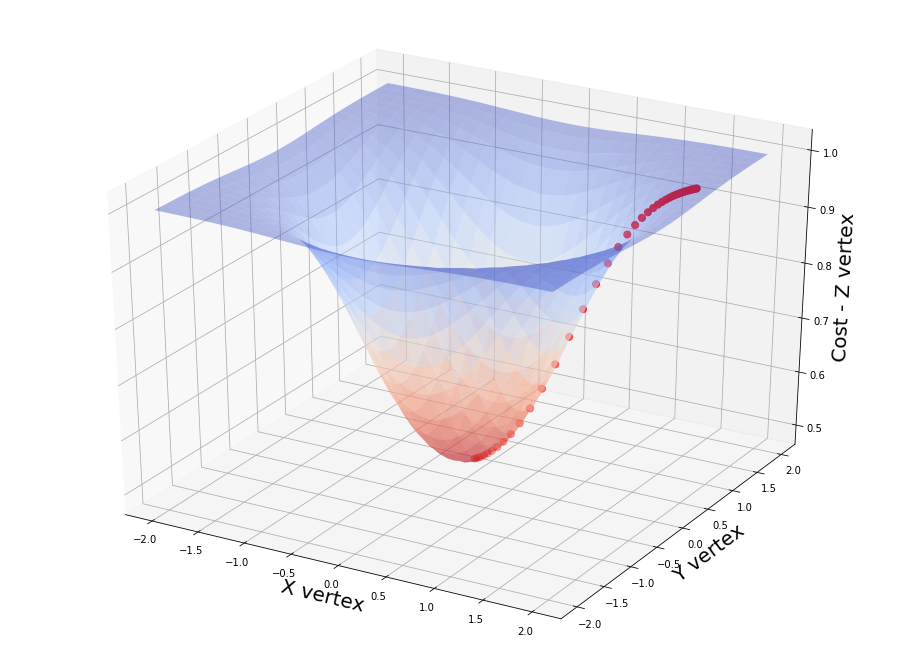

In [130]:
# Generate 3D plot with scatter
x_4 = np.linspace(start= -2, stop=2, num=55)
y_4 = np.linspace(start= -2, stop=2, num=55)
x_4, y_4 = np.meshgrid(x_4, y_4)


def f(x, y):
    r=3**(-x**2 - y**2)
    return 1/(r + 1)



# Plot graphs
fig = plt.figure(figsize=[16,12])
ax=fig.gca(projection='3d')

ax.set_xlabel("X vertex", fontsize=20)
ax.set_ylabel("Y vertex", fontsize=20)
ax.set_zlabel("Cost - Z vertex", fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm_r , alpha=0.4)
ax.scatter (values_array[:,0], values_array[:,1], f(values_array[:,0], values_array[:,1]), s=50, color='red')
plt.show()
#help(cm)

### Example 5 -  working with Data & Real Cost Function
#### Mean Squared Error: cost function for regression problems
##### $$ RSS = \sum_{i=1}^{n} \big ( y^{(i)} - h_\theta x^{(i)} \big)^2$$
##### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big ( y^{(i)} - h_\theta x^{(i)} \big)^2$$
##### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big ( y- \hat{y} \big)^2$$

In [131]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array: ', x_5.shape)
print('Shape of y_5 array: ', y_5.shape)

Shape of x_5 array:  (7, 1)
Shape of y_5 array:  (7, 1)


In [132]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0: ', regr.intercept_[0])
print('Theta 1: ', regr.coef_[0][0])


Theta 0:  0.8475351486029536
Theta 1:  1.2227264637835915


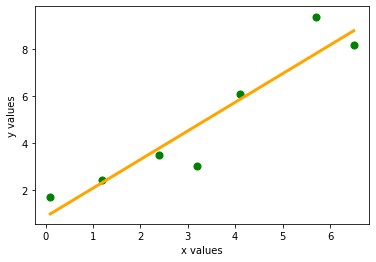

In [133]:
plt.scatter(x_5, y_5, s=50, color='green')
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [134]:
# y_hat = theta0 + theta1 * x
y_hat = regr.intercept_[0] + regr.coef_[0][0] * x_5
print('Estimated values y_hat are:\n', y_hat)
print('Actual values y are: \n', y_5)

Estimated values y_hat are:
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
Actual values y are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [135]:
# Functio y, y_hat and return MSE
# MSE = \frac{1}{n} \sum_{i=1}^{n} \big ( y- \hat{y} \big)^2$$
def mse(y, y_hat):
    #mse_calc= (1/y.shape[0]) * sum((y - y_hat)**2)
    #mse_calc= (1/y.size) * sum((y - y_hat)**2)
    mse_calc= np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [136]:
print('Zvone MSE: ', mse(y_5, y_hat))
print('sklearn MSE regression manual calc: ', mean_squared_error(y_5, y_hat))
print('sklearn MSE regression: ', mean_squared_error(y_5, regr.predict(x_5)))

Zvone MSE:  [0.94796558]
sklearn MSE regression manual calc:  0.9479655759794577
sklearn MSE regression:  0.9479655759794577


### 3d Plot for the MSE Cost Function
##### Make data for thetas

In [137]:
number_thetas = 200
th_0 = np.linspace (start=-1, stop=3, num=number_thetas)
th_1 = np.linspace (start=-1, stop=3, num=number_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
#th_0.shape
#plot_t0


### Calc MES with nested loops

In [138]:
plot_cost = np.zeros((number_thetas, number_thetas))
#plot_cost

for i in range(number_thetas):
    for j in range(number_thetas):
        #print(plot_t0[j,i])
        y_hat = plot_t0[i][j] +  plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)
    
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)
      

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


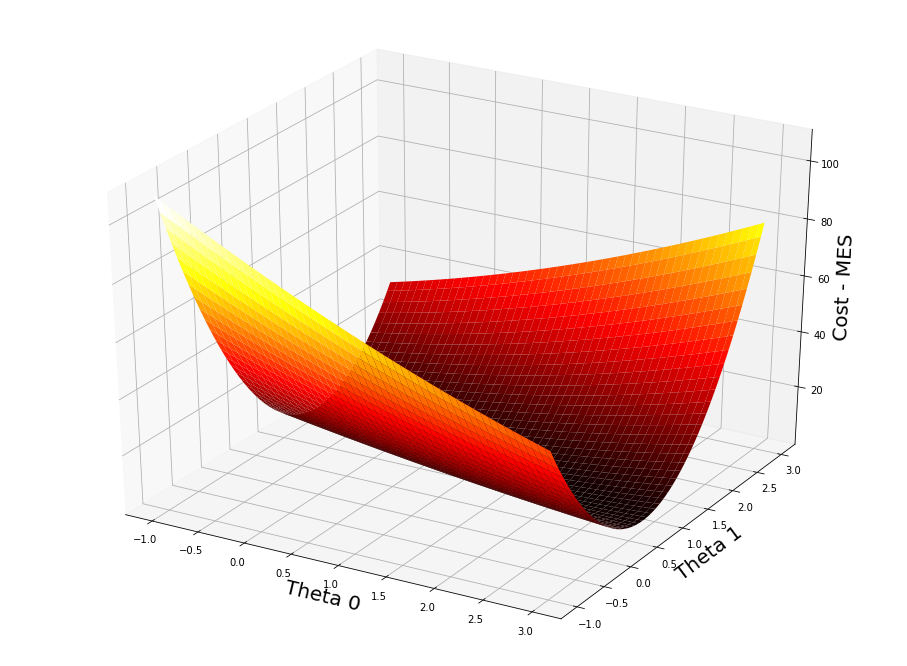

In [139]:
# plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MES', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [140]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min is at (i,j): ', ij_min)
print('Min MSE fot Theta 0 at  is at ', ij_min, ' is: ', plot_t0[ij_min[0]][ij_min[1]])
print('Min MSE fot Theta 1 at  is at ', ij_min, ' is: ', plot_t1[ij_min[0]][ij_min[1]])

Min value of plot_cost 0.9483826526747164
Min is at (i,j):  (111, 91)
Min MSE fot Theta 0 at  is at  (111, 91)  is:  0.829145728643216
Min MSE fot Theta 1 at  is at  (111, 91)  is:  1.2311557788944723


### Partial Derivatives of MSE with respect to $\theta_0$ and $\theta_1$
## $$ \frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$
## $$ \frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big) $$

### MSE & Grad Descent

In [141]:
# inputs: x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n= y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    #grad_desc = np.array([theta0_slope[0], theta0_slope[1]])
    #grad_desc = np.append(arr=theta0_slope, values=theta1_slope)
    grad_desc = np.concatenate((theta0_slope, theta1_slope), axis=0)        
    return grad_desc

In [166]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# collect starting data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals  = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)  
    mse_vals  = np.concatenate((mse_vals, mse(y_5, thetas[0] + thetas[1] * x_5)), axis=0)  
    
# Results
print('Min for Theta0: ', thetas[0])
print('Min for Theta1: ', thetas[1])
print('MSE: ',  mse(y_5, thetas[0] + thetas[1] * x_5))

Min for Theta0:  0.8532230461743415
Min for Theta1:  1.2214935332607393
MSE:  [0.94797511]


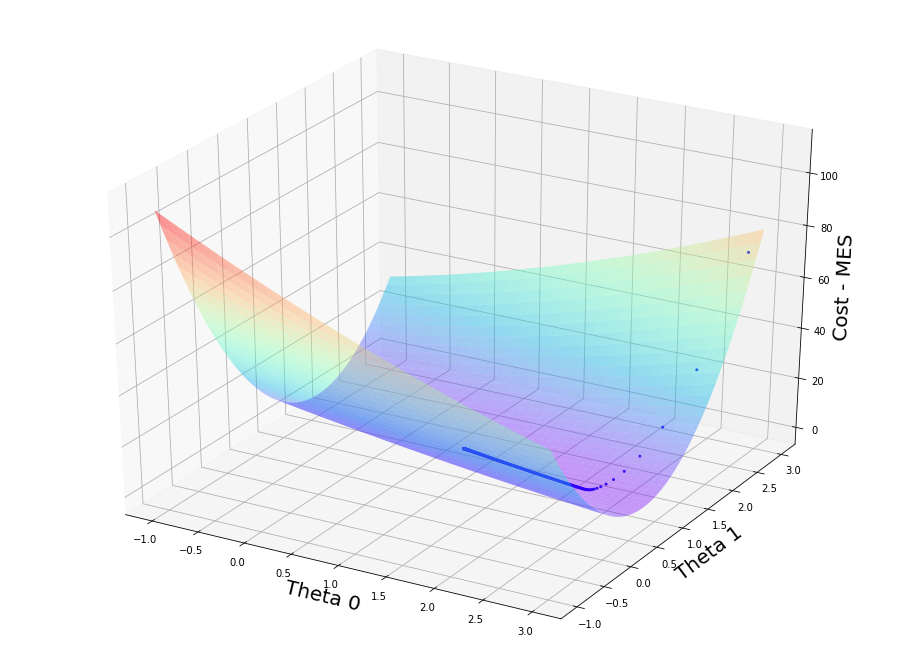

In [167]:
# plotting MSE
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MES', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=4, color='blue')
plt.show()